<h1><b>ANÁLISE DE DADOS REFERENTES AOS ESTUDANTES DE MATEMÁTICA</b></h1>

Dados do ano escolar 2005/2006 de duas escolas públicas de Portugal

<h1><b>Importando as bibliotecas</b></h1>

In [1]:
# Importando as bibliotecas para preprocessamento
import pandas as pd
import numpy as np
# Importando bibliotecas para explorar
import matplotlib.pyplot as plt
import seaborn as sns
# utilizaremos o ggplot para melhores gráficos
plt.style.use('ggplot')

<h1><b>Importando dados dos estudantes</b></h1>

In [2]:
# criando função mat relacionada aos dados dos estudantes de matemática e separando por coluna
mat = pd.read_csv('studemat.csv', sep=";")

<h1><b>Uma visão geral dos dados</b></h1>

In [3]:
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# Estatísticas básicas para variáveis numéricas
mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
# Outras informações
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

Há 395 entradas referentes às respostas dos estudantes e não há nenhuma informação nula ou não preenchida.

In [6]:
#Modelagem binária de G3 em pass/fail
mat['G3_results']=mat['G3'].map(lambda x: 'pass' if x>=10 else 'fail')
mat.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_results
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,pass


<b>Criando gráfico para visualização de relações de 2 a 2 features escolhidas</b>

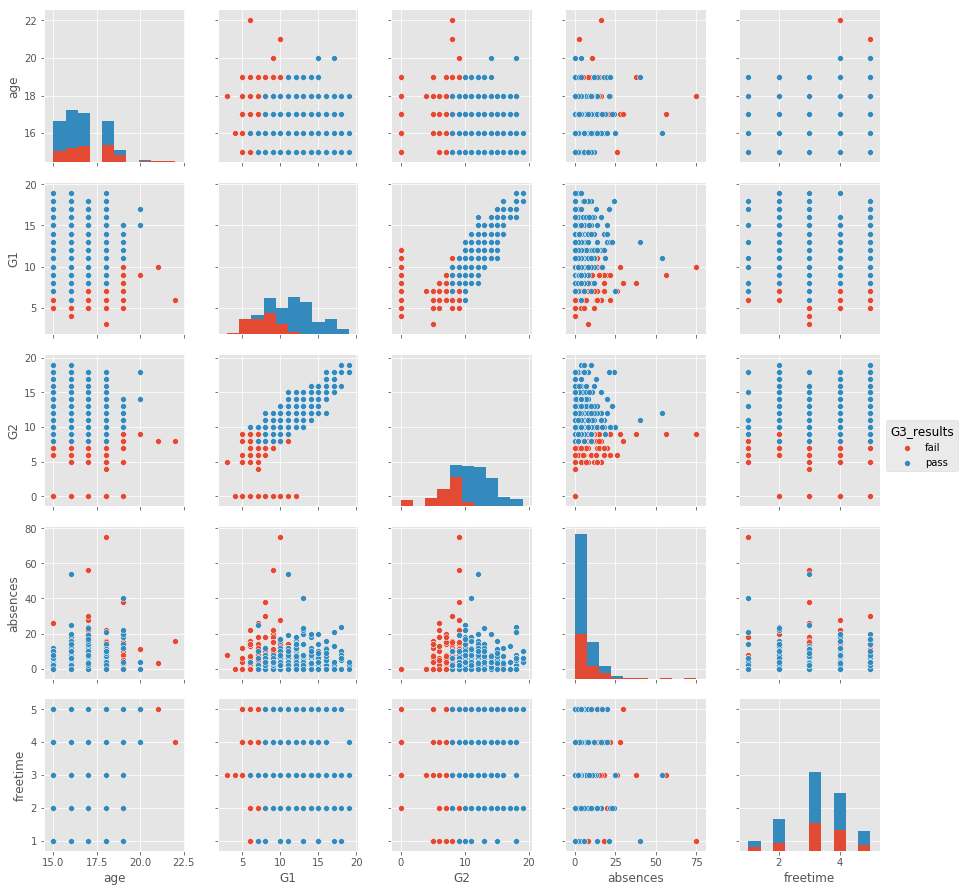

In [7]:
num = ['age', 'G1','G2','absences','freetime']
sns.pairplot(mat[num+['G3_results']], hue="G3_results")
plt.show()

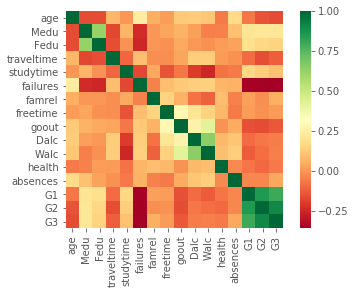

In [8]:
# Explorando correlações com seaborn
sns.heatmap(mat.corr(), square=True, cmap='RdYlGn')
plt.show()

<h1><b>Explorando os dados</b></h1>

In [9]:
mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'G3_results'],
      dtype='object')

Analisando algumas destas colunas!

<h1><b>AGE</h1></b>

C:\Users\junec\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


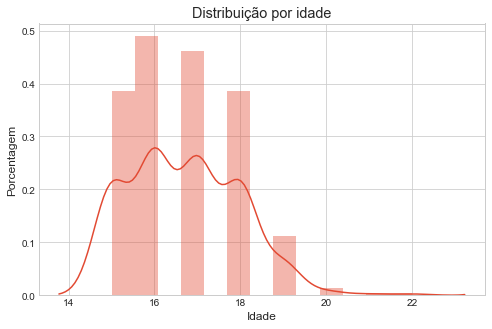

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.distplot(mat.age)
plt.xlabel('Idade')
plt.ylabel('Porcentagem')
plt.title('Distribuição por idade')
plt.show()

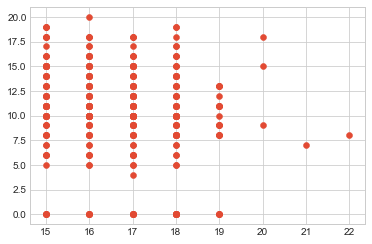

In [11]:
plt.scatter(mat['age'],mat['G3'])
plt.show()

<h1><b>G3 / G3_results</b></h1>

In [12]:
mat['G3_results'].unique()

array(['fail', 'pass'], dtype=object)

In [13]:
# Contando quantidade de alunos aprovados e reprovados
mat['G3_results'].value_counts()

pass    265
fail    130
Name: G3_results, dtype: int64

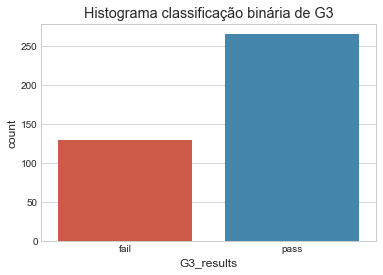

In [14]:
# Gráfico de Aprovação e Reprovação
sns.countplot(x='G3_results',data=mat)
plt.title('Histograma classificação binária de G3')
plt.show()

C:\Users\junec\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


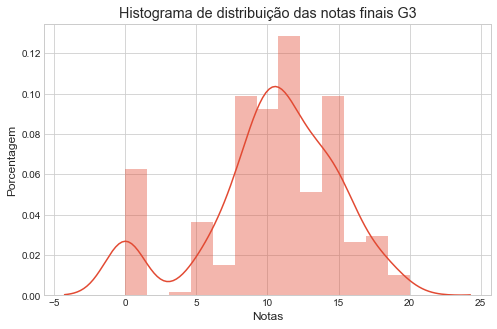

In [15]:
# Gráfico de distribuição por notas finais
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.distplot(mat.G3)
plt.xlabel('Notas')
plt.ylabel('Porcentagem')
plt.title('Histograma de distribuição das notas finais G3')
plt.show()

In [16]:
# Criando dicionário de níveis de classificação de notas pelo sistema Erasmus
# I -excellent/very good (16-20), II - good (14-15), III - satisfactory (12-13), IV - sufficient (10-11) e V - fail (0-9)
G3_level = {
    0:'V',
     1:'V',
     2:'V',
     3:'V',
     4:'V',
     5:'V',
     6:'V',
     7:'V',
     8:'V',
    9:'V',
    10:'IV',
    11:'IV',
    12:'III',
    13:'III',
    14:'II',
    15:'II',
    16:'I',
    17:'I',
    18:'I',
    19:'I',
    20:'I'
}

In [17]:
# Acrescentando a coluna level
mat['G3_level'] = mat['G3'].map(G3_level)
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_results,G3_level
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,fail,V
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,fail,V
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,pass,IV
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,pass,II
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,pass,IV


In [18]:
mat['G3_level'].unique()

array(['V', 'IV', 'II', 'I', 'III'], dtype=object)

In [19]:
# Quantidade de alunos classificados por nível de acordo com Erasmus
mat['G3_level'].value_counts()

V      130
IV     103
III     62
II      60
I       40
Name: G3_level, dtype: int64

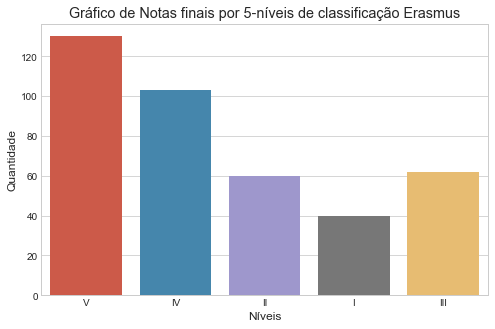

In [20]:
# Grafico das notas finais por nível de classificação Erasmus
plt.figure(figsize=(8,5))
sns.countplot(x='G3_level',data=mat)
plt.xlabel('Níveis')
plt.ylabel('Quantidade')
plt.title('Gráfico de Notas finais por 5-níveis de classificação Erasmus')
plt.show()

<h1><b>SEX</h1></b>

In [21]:
mat['sex'].unique()

array(['F', 'M'], dtype=object)

In [22]:
mat['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

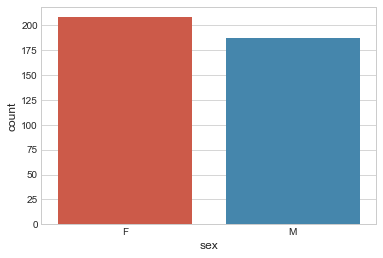

In [23]:
# Gráfico de contagem de estudantes em masculino (M) e feminino (F)
sns.countplot(x='sex', data=mat)
plt.show()

In [24]:
pass_sex = mat[mat['G3_results']=='pass']['sex'].value_counts()
fail_sex = mat[mat['G3_results']=='fail']['sex'].value_counts()
# criando função data
data = pd.DataFrame([pass_sex,fail_sex])
data.index = ['pass','fail']
data.columns = ['F','M']
data

,F,M
pass,133,132
fail,75,55


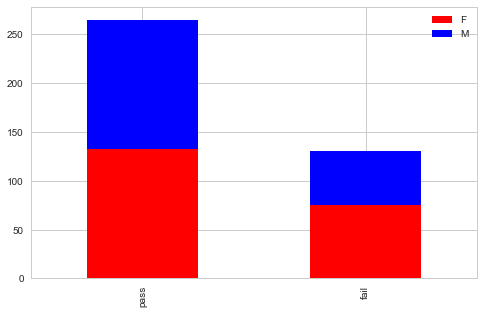

In [25]:
sns.set(style="whitegrid")
data.plot(kind='bar',stacked=True, figsize=(8,5), color=['r','b'])
plt.show()

<h1><b>School</b></h1>

In [26]:
mat['school'].unique()

array(['GP', 'MS'], dtype=object)

In [27]:
# Quantidade de alunos por escolas
mat['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

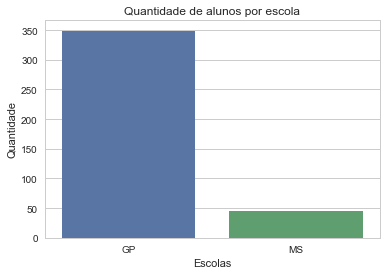

In [28]:
# Gráfico quantidade de alunos por escolas
sns.countplot(x='school',data=mat)
plt.xlabel('Escolas')
plt.ylabel('Quantidade')
plt.title('Quantidade de alunos por escola')
plt.show()

In [29]:
# Alunos aprovados por escola
aprovado_school = mat[mat['G3_results']=='pass']['school'].value_counts()
reprovado_school = mat[mat['G3_results']=='fail']['school'].value_counts()
# Criando função RS
RS = pd.DataFrame([aprovado_school,reprovado_school])
RS.index = ['pass','fail']
RS

,GP,MS
pass,236,29
fail,113,17


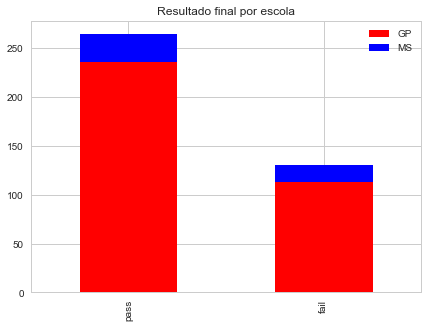

In [30]:
sns.set(style="whitegrid")
RS.plot(kind='bar', stacked=True, figsize=(7,5), color=['r','b'])
plt.title('Resultado final por escola')
plt.show()

<b>Reason x School</b>

In [31]:
# verificando as escolhas por cada escola
GP_reason = mat[mat['school']=='GP']['reason'].value_counts()
MS_reason = mat[mat['school']=='MS']['reason'].value_counts()
# criando função data
data = pd.DataFrame([GP_reason,MS_reason])
data.index = ['GP','MS']
data.columns = ['course','reputation', 'home', 'other']
data

,course,reputation,home,other
GP,124,100,98,27
MS,21,5,11,9


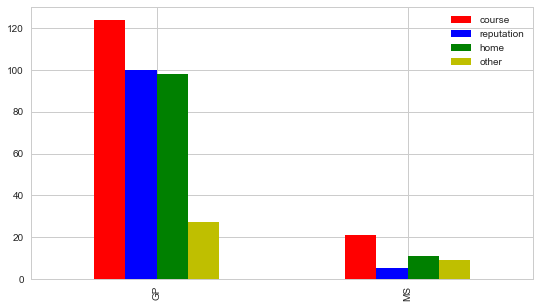

In [32]:
# gráfico das escolhas por cada escola
sns.set(style="whitegrid")
data.plot(kind='bar',stacked=False, figsize=(9,5), color=['r','b','g','y'])
plt.show()

<h1><b> Preprocessamento</b></h1>

<b>Discretizando variáveis nominais</b>

In [33]:
mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'G3_results',
       'G3_level'],
      dtype='object')

In [34]:
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_results,G3_level
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,fail,V
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,fail,V
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,pass,IV
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,pass,II
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,pass,IV


In [35]:
# Discretizando a coluna School
def discretizeSchool(school):
    if school == 'GP':
        return 1
    else:
        return 0
mat['school'] = mat['school'].map(discretizeSchool)
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_results,G3_level
0,1,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,fail,V
1,1,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,fail,V
2,1,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,pass,IV
3,1,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,pass,II
4,1,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,pass,IV


In [36]:
# Discretizando a coluna Sex
def discretizeSex(sex):
    if sex == 'F':
        return 1
    else:
        return 0
mat['sex'] = mat['sex'].map(discretizeSex)

In [37]:
mat['address'].unique()

array(['U', 'R'], dtype=object)

In [38]:
# Discretizando a coluna address
def discretizeAddress(address):
    if address == 'U':
        return 1
    else:
        return 0
mat['address'] = mat['address'].map(discretizeAddress)

In [39]:
mat['famsize'].unique()

array(['GT3', 'LE3'], dtype=object)

In [40]:
# Discretizando a coluna famsize
def discretizeFamsize(famsize):
    if famsize == 'GT3':
        return 1
    else:
        return 0
mat['famsize'] = mat['famsize'].map(discretizeFamsize)
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_results,G3_level
0,1,1,18,1,1,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,fail,V
1,1,1,17,1,1,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,fail,V
2,1,1,15,1,0,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,pass,IV
3,1,1,15,1,1,T,4,2,health,services,...,2,1,1,5,2,15,14,15,pass,II
4,1,1,16,1,1,T,3,3,other,other,...,2,1,2,5,4,6,10,10,pass,IV


In [41]:
mat['Pstatus'].unique()

array(['A', 'T'], dtype=object)

In [42]:
# Discretizando a coluna Pstatus
def discretizePstatus(Pstatus):
    if Pstatus == 'A':
        return 1
    else:
        return 0
mat['Pstatus'] = mat['Pstatus'].map(discretizePstatus)

In [43]:
mat['Mjob'].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [44]:
# criando dummies para Mjob (trabalho da mãe)
Mjob_dummies = pd.get_dummies(mat['Mjob'],prefix='Mjob')
# concatenando os dummies ao Data frame
mat = pd.concat([mat,Mjob_dummies],axis=1)
# removendo a antiga coluna Mjob
mat.drop('Mjob',1,inplace=True)
# mostrando o novo mat
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Fjob,reason,...,G1,G2,G3,G3_results,G3_level,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,1,1,18,1,1,1,4,4,teacher,course,...,5,6,6,fail,V,1,0,0,0,0
1,1,1,17,1,1,0,1,1,other,course,...,5,5,6,fail,V,1,0,0,0,0
2,1,1,15,1,0,0,1,1,other,other,...,7,8,10,pass,IV,1,0,0,0,0
3,1,1,15,1,1,0,4,2,services,home,...,15,14,15,pass,II,0,1,0,0,0
4,1,1,16,1,1,0,3,3,other,home,...,6,10,10,pass,IV,0,0,1,0,0


In [45]:
mat['Fjob'].value_counts()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

In [46]:
# criando dummies para Fjob (trabalho da pai)
Fjob_dummies = pd.get_dummies(mat['Fjob'],prefix='Fjob')
# concatenando os dummies ao Data frame
mat = pd.concat([mat,Fjob_dummies],axis=1)
# removendo a antiga coluna Fjob
mat.drop('Fjob',1,inplace=True)
# mostrando o novo mat

In [47]:
mat['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [48]:
# criando dummies para guardian (guardião do aluno)
guardian_dummies = pd.get_dummies(mat['guardian'],prefix='guardian')
# concatenando os dummies ao Data frame
mat = pd.concat([mat,guardian_dummies],axis=1)
# removendo a antiga coluna guardian
mat.drop('guardian',1,inplace=True)
# mostrando o novo mat

In [49]:
mat['reason'].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

In [50]:
# criando dummies para reason (razão para escolha da escola)
reason_dummies = pd.get_dummies(mat['reason'],prefix='reason')
# concatenando os dummies ao Data frame
mat = pd.concat([mat,reason_dummies],axis=1)
# removendo a antiga coluna reason
mat.drop('reason',1,inplace=True)
# mostrando o novo mat

In [51]:
mat['schoolsup'].unique()

array(['yes', 'no'], dtype=object)

In [52]:
# Discretizando a coluna schoolsup
def discretizeSchoolsup(schoolsup):
    if schoolsup == 'yes':
        return 1
    else:
        return 0
mat['schoolsup'] = mat['schoolsup'].map(discretizeSchoolsup)

In [53]:
mat['famsup'].unique()

array(['no', 'yes'], dtype=object)

In [54]:
# Discretizando a coluna famsup
def discretizeFamsup(famsup):
    if famsup == 'yes':
        return 1
    else:
        return 0
mat['famsup'] = mat['famsup'].map(discretizeFamsup)

In [55]:
mat['paid'].unique()

array(['no', 'yes'], dtype=object)

In [56]:
# Discretizando a coluna paid
def discretizePaid(paid):
    if paid == 'yes':
        return 1
    else:
        return 0
mat['paid'] = mat['paid'].map(discretizePaid)

In [57]:
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other,reason_course,reason_home,reason_other,reason_reputation
0,1,1,18,1,1,1,4,4,2,2,...,0,0,1,0,1,0,1,0,0,0
1,1,1,17,1,1,0,1,1,1,2,...,1,0,0,1,0,0,1,0,0,0
2,1,1,15,1,0,0,1,1,1,2,...,1,0,0,0,1,0,0,0,1,0
3,1,1,15,1,1,0,4,2,1,3,...,0,1,0,0,1,0,0,1,0,0
4,1,1,16,1,1,0,3,3,1,2,...,1,0,0,1,0,0,0,1,0,0


In [58]:
mat['activities'].unique()

array(['no', 'yes'], dtype=object)

In [59]:
# Discretizando a coluna activities
def discretizeAct(activities):
    if activities == 'yes':
        return 1
    else:
        return 0
mat['activities'] = mat['activities'].map(discretizeAct)

In [60]:
# Discretizando a coluna nursery
def discretizeNursery(nursery):
    if nursery == 'yes':
        return 1
    else:
        return 0
mat['nursery'] = mat['nursery'].map(discretizeNursery)

In [61]:
# Discretizando a coluna higher
def discretizeHigher(higher):
    if higher == 'yes':
        return 1
    else:
        return 0
mat['higher'] = mat['higher'].map(discretizeHigher)

In [62]:
# Discretizando a coluna internet
def discretizeInternet(internet):
    if internet == 'yes':
        return 1
    else:
        return 0
mat['internet'] = mat['internet'].map(discretizeInternet)

In [63]:
# Discretizando a coluna romantic
def discretizeRomantic(romantic):
    if romantic == 'yes':
        return 1
    else:
        return 0
mat['romantic'] = mat['romantic'].map(discretizeRomantic)
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other,reason_course,reason_home,reason_other,reason_reputation
0,1,1,18,1,1,1,4,4,2,2,...,0,0,1,0,1,0,1,0,0,0
1,1,1,17,1,1,0,1,1,1,2,...,1,0,0,1,0,0,1,0,0,0
2,1,1,15,1,0,0,1,1,1,2,...,1,0,0,0,1,0,0,0,1,0
3,1,1,15,1,1,0,4,2,1,3,...,0,1,0,0,1,0,0,1,0,0
4,1,1,16,1,1,0,3,3,1,2,...,1,0,0,1,0,0,0,1,0,0


In [64]:
# Aplicando classificação binária fail/pass na coluna G3
mat['G3'] = mat['G3'].map(lambda x: 'pass' if x>=10 else 'fail')
#Excluindo a coluna G3_level e G3_results
mat.drop(['G3_results', 'G3_level'],1,inplace=True)
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other,reason_course,reason_home,reason_other,reason_reputation
0,1,1,18,1,1,1,4,4,2,2,...,0,0,1,0,1,0,1,0,0,0
1,1,1,17,1,1,0,1,1,1,2,...,1,0,0,1,0,0,1,0,0,0
2,1,1,15,1,0,0,1,1,1,2,...,1,0,0,0,1,0,0,0,1,0
3,1,1,15,1,1,0,4,2,1,3,...,0,1,0,0,1,0,0,1,0,0
4,1,1,16,1,1,0,3,3,1,2,...,1,0,0,1,0,0,0,1,0,0


In [65]:
mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother',
       'guardian_other', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation'],
      dtype='object')

<h1><b>Modelagem</b></h1>

In [66]:
#Importando os modelos de classificadores
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [67]:
X = mat.drop('G3',1) # variaveis
y = mat['G3'] # target

In [68]:
# separando o conjunto de treino e de teste - escolhendo os parâmetros do modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.4,
    random_state=42,
    stratify=y)

<b>Random Forest</b>

In [69]:
#Instanciando o modelo
forest = RandomForestClassifier()
#Ajustando o modelo aos dados
forest.fit(X_train,y_train)
#Gerando as classificações para o conjunto de teste
y_pred = forest.predict(X_test)
# Avaliando o modelo
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# gerando matriz de confusão
print(confusion_matrix(y_test,y_pred))
# gerando métricas associadas
print(classification_report(y_test,y_pred))

[[46  6]
 [12 94]]
             precision    recall  f1-score   support

       fail       0.79      0.88      0.84        52
       pass       0.94      0.89      0.91       106

avg / total       0.89      0.89      0.89       158



<b>Extra trees</b>

In [70]:
# Instanciando o modelo
extra = ExtraTreesClassifier()
# Ajustando o modelo aos dados
extra = extra.fit(X_train, y_train)
# gerando as classificações para o conjunto de teste
y_pred = extra.predict(X_test)
# gerando métricas associadas a matriz de confusão
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

       fail       0.79      0.71      0.75        52
       pass       0.86      0.91      0.88       106

avg / total       0.84      0.84      0.84       158



<b>AdaBoost e KNeighbors Classifier</b>

In [71]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Resultado dos testes:

In [72]:
print("Forest : {}".format(forest.score(X_test,y_test)))
print("Extra : {}".format(extra.score(X_test,y_test)))
print("Knn : {}".format(knn.score(X_test,y_test)))
print("Ada : {}".format(ada.score(X_test,y_test)))

Forest : 0.8860759493670886
Extra : 0.8417721518987342
Knn : 0.8734177215189873
Ada : 0.879746835443038


In [73]:
models = [
    RandomForestClassifier(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
    LinearSVC()
]

In [74]:
for model in models:
    model.fit(X_train, y_train)
for model in models:
    print(str(model).split('(')[0]+" : {}".format(model.score(X_test,y_test)))

RandomForestClassifier : 0.8670886075949367
KNeighborsClassifier : 0.8734177215189873
AdaBoostClassifier : 0.879746835443038
ExtraTreesClassifier : 0.8354430379746836
BaggingClassifier : 0.8860759493670886
LinearSVC : 0.879746835443038


In [75]:
scores = []
for model in models:
    scores.append(model.score(X_test,y_test))
model_names = []
for model in models:
    model_names.append(str(model).split('(')[0])

In [76]:
final = pd.DataFrame({
    'Modelos':model_names,
    'Scores':scores
})

In [77]:
final

,Modelos,Scores
0,RandomForestClassifier,0.867089
1,KNeighborsClassifier,0.873418
2,AdaBoostClassifier,0.879747
3,ExtraTreesClassifier,0.835443
4,BaggingClassifier,0.886076
5,LinearSVC,0.879747


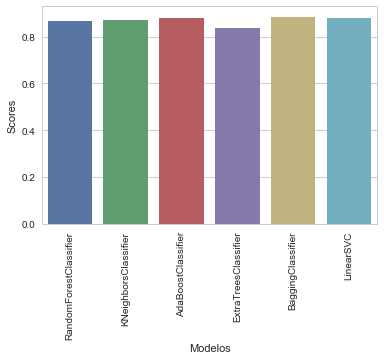

In [78]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Modelos", y="Scores", data=final)
plt.xticks(rotation=90)
plt.show()

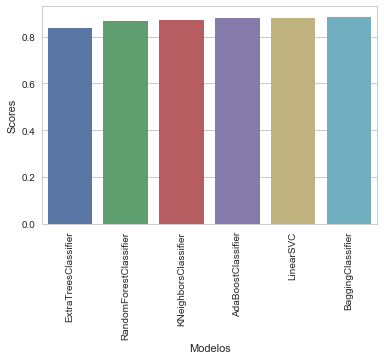

In [79]:
final = final.sort_values(by=['Scores'])
sns.set(style="whitegrid")
ax = sns.barplot(x="Modelos", y="Scores", data=final)
plt.xticks(rotation=90)
plt.show()